# **PREDICTIVE ANALYSIS / COFFEE SHOP SALES**
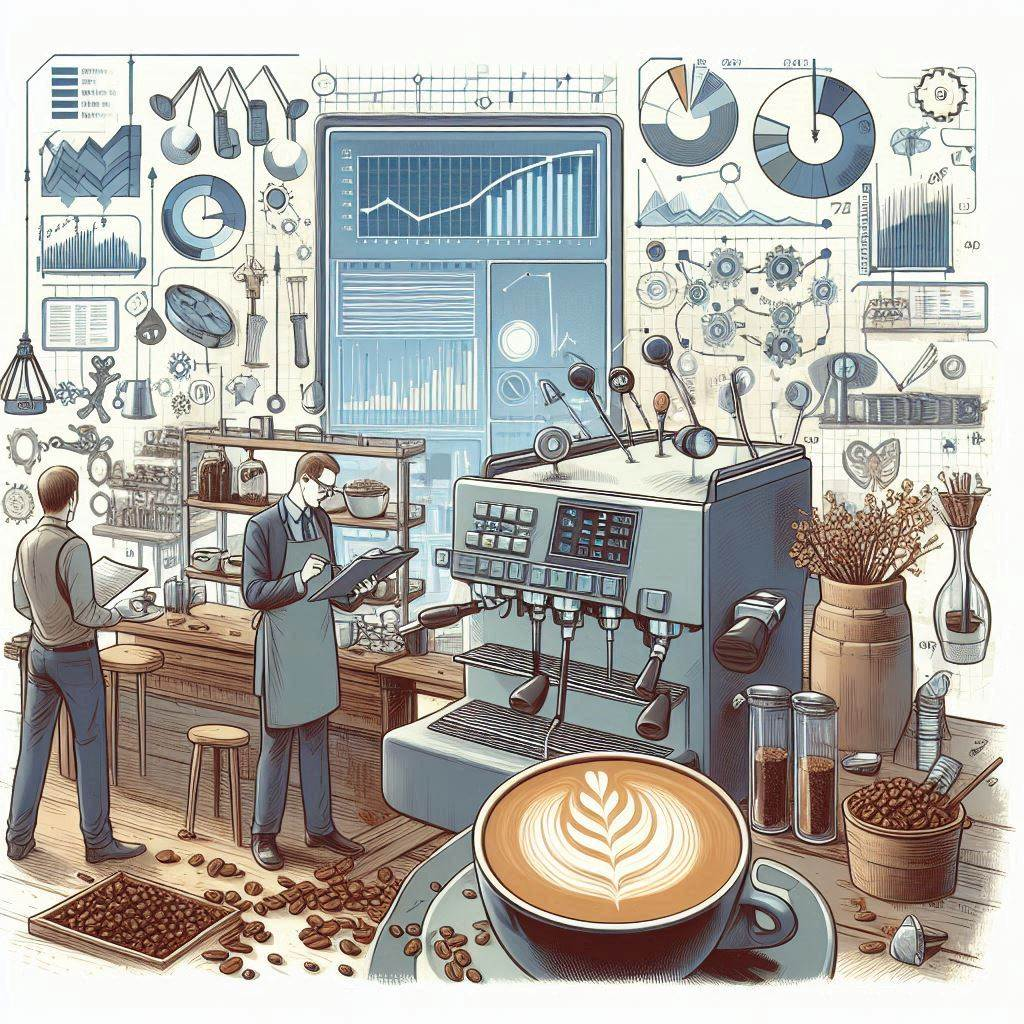
### **Objective**
The objective of this project is to clean and analyze a dataset of coffee shop sales to determine the profitability of products and services. It includes identifying strategies to increase profit margins or mitigate losses based on the analysis.

## **1. Load the Dataset and Initial Inspection**
Loaded the dataset and performed an initial inspection to understand its structure and basic statistics.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("Coffee Shop Sales.xlsx")

### **Initial inspection**

In [2]:
print(data.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None


In [4]:
print(data.shape)

(149116, 11)


In [5]:
print(data.describe())

       transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.542509   

            store_id     product_id     unit_price  
count  149116.000000  149116.000000  149116.000000  
mean        5.342063      47.918607       3.382219  
min         3.000000       1.000000       0.800000  
25%         3.000000      33.000000       2.500000  
50%         5.000000      47.000000       3.000000  
75%         8.000000    

## **2. Data Cleaning**

#### **1. Check for Missing Values**

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


#### **2. Remove Duplicates**

In [7]:
# Remove duplicates
duplicates = data.duplicated().sum()
data_cleaned = data.drop_duplicates()
print(f"Duplicates found: {duplicates}")
print(f"Shape after removing duplicates: {data_cleaned.shape}")

Duplicates found: 0
Shape after removing duplicates: (149116, 11)


#### **3. Standardize Data formats**
- Standardized data formats by converting all non-string values to strings and stripping leading/trailing spaces.
- Converted 'transaction_time' to a proper time format for consistency.

In [8]:
# Convert all non-string values in object columns to strings
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].astype(str)

In [9]:
# Strip leading/trailing spaces from object type columns
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].str.strip()

In [10]:
# Display cleaned data info
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None


#### **4. Check for outliers**

In [11]:
# Check for outliers in numerical columns
print(data_cleaned.describe())

       transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.542509   

            store_id     product_id     unit_price  
count  149116.000000  149116.000000  149116.000000  
mean        5.342063      47.918607       3.382219  
min         3.000000       1.000000       0.800000  
25%         3.000000      33.000000       2.500000  
50%         5.000000      47.000000       3.000000  
75%         8.000000    

In [12]:
# Convert 'transaction_time' to proper time format
data_cleaned['transaction_time'] = pd.to_datetime(data_cleaned['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time

In [13]:
# Display cleaned data info again to ensure all changes are applied
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None


#### **5. Save the cleaned dataset**

In [14]:
# Save the cleaned dataset for further analysis
data_cleaned.to_excel("Cleaned_Coffee_Shop_Sales.xlsx", index=False)

## **3. Profit/Loss Analysis**

#### **1. Calculating Total Sales, Costs, and Profit**
To perform these calculations, we need to make some assumptions:

- **Total Sales:** transaction_qty * unit_price
- **Cost:** Assuming a fixed cost per unit, we might need additional data or an assumption for the cost. For this example, let's assume a generic cost, say 70% of the unit price (this can be adjusted based on actual cost data if available).

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Add a column for total sales
data_cleaned['total_sales'] = data_cleaned['transaction_qty'] * data_cleaned['unit_price']

In [17]:
# Group by product_detail to get total sales and profit
product_summary = data_cleaned.groupby('product_detail').agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',
    'total_sales': 'sum'
}).reset_index()

In [18]:
# Calculate profit
product_summary['profit'] = product_summary['total_sales'] - (product_summary['transaction_qty'] * product_summary['unit_price'])

#### **2. Visualizing Sales Data**

##### **1. Total sales for each product**

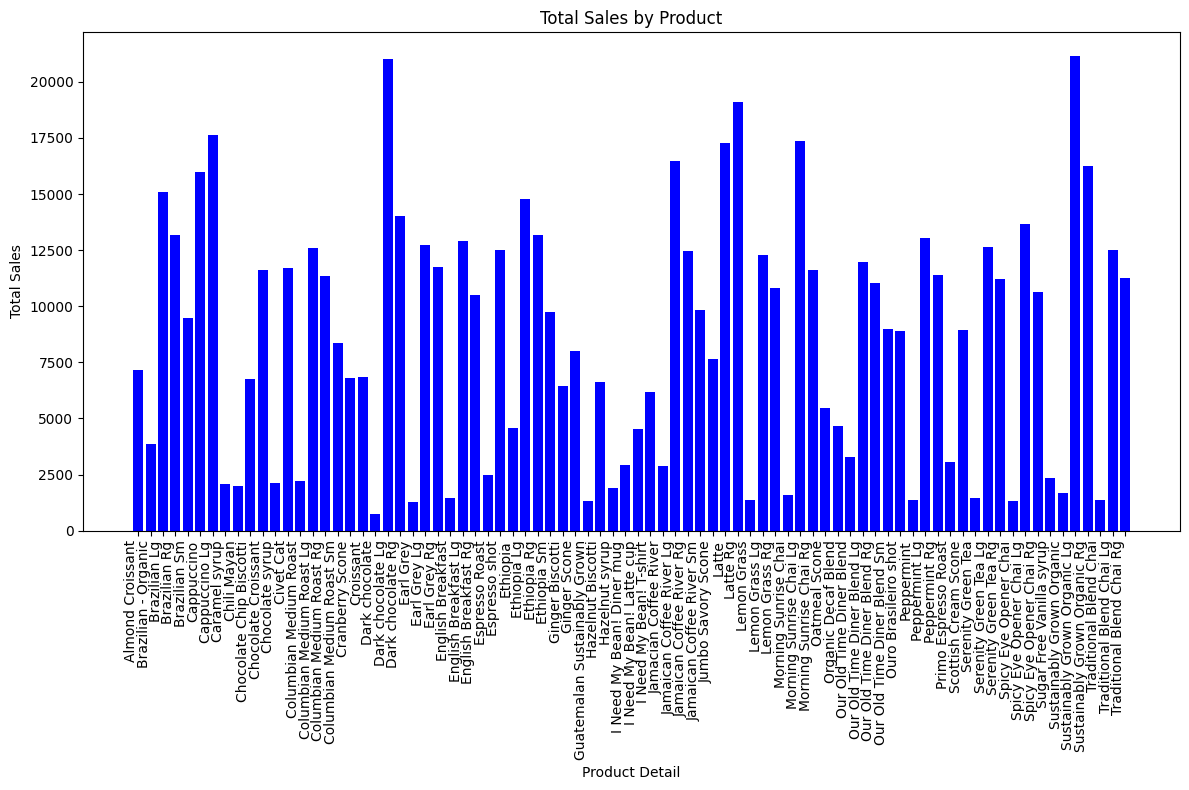

In [64]:
# Plot total sales for each product
plt.figure(figsize=(12, 8))
plt.bar(product_summary['product_detail'], product_summary['total_sales'], color='blue')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

##### **2. Profit for each product**

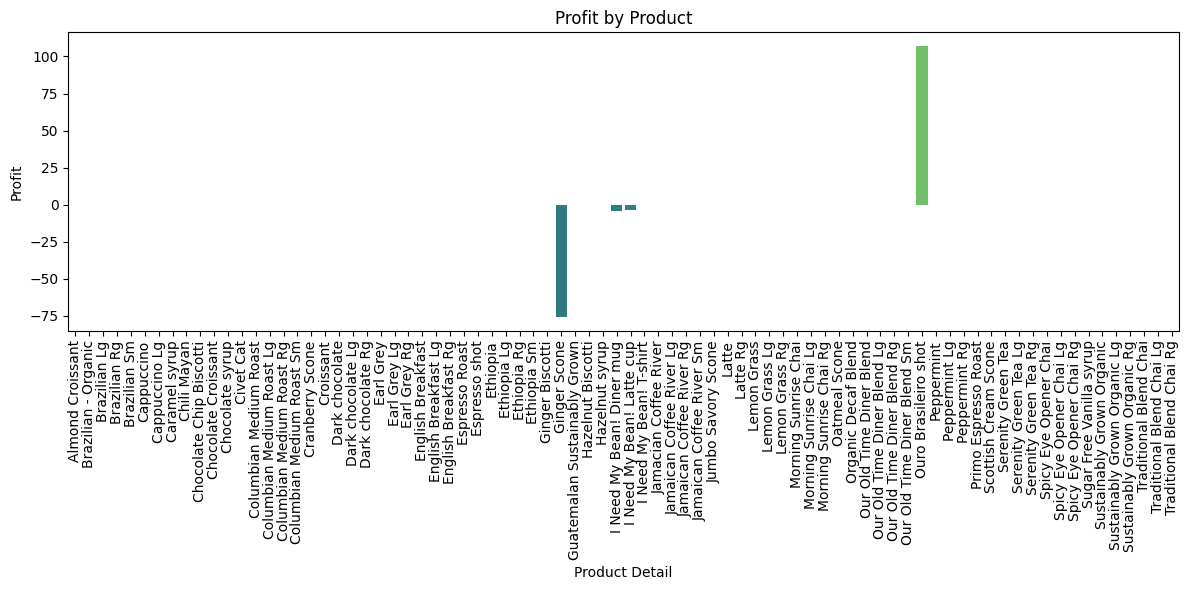

In [82]:
# Plot profit for each product
plt.figure(figsize=(12, 6))
sns.barplot(x='product_detail', y='profit', data=product_summary, hue='product_detail', palette='viridis', dodge=False)
plt.xticks(rotation=90)
plt.title('Profit by Product')
plt.xlabel('Product Detail')
plt.ylabel('Profit')
plt.legend([], frameon=False)  # Hide legend to comply with warning
plt.tight_layout()
plt.show()

### **3. Identifying Profitable and Loss-Making Products**

In [21]:
# Products generating profit
profitable_products = product_summary[product_summary['profit'] > 0]
print("Profitable products:\n", profitable_products)

# Products incurring losses
loss_products = product_summary[product_summary['profit'] <= 0]
print("Products incurring losses:\n", loss_products)

Profitable products:
           product_detail  transaction_qty  unit_price  total_sales  \
38        Hazelnut syrup             2372     0.80000       1897.6   
61  Ouro Brasileiro shot             3262     2.69622       8902.2   

          profit  
38  2.273737e-13  
61  1.071316e+02  
Products incurring losses:
                   product_detail  transaction_qty  unit_price  total_sales  \
0               Almond Croissant             1911    3.750988      7168.13   
1            Brazilian - Organic              214   18.000000      3852.00   
2                   Brazilian Lg             4317    3.500000     15109.50   
3                   Brazilian Rg             4385    3.000000     13155.00   
4                   Brazilian Sm             4310    2.200000      9482.00   
..                           ...              ...         ...          ...   
75  Sustainably Grown Organic Lg             4453    4.750000     21151.75   
76  Sustainably Grown Organic Rg             4329    3.750

In [22]:
# Sort by profit to find the most profitable products
top_profitable_products = profitable_products.sort_values(by='profit', ascending=False)
top_loss_making_products = loss_products.sort_values(by='profit', ascending=True)

##### **1. Top 10 Profitable products**

Top 10 Profitable Products:
           product_detail  transaction_qty  unit_price  total_sales  \
61  Ouro Brasileiro shot             3262     2.69622       8902.2   
38        Hazelnut syrup             2372     0.80000       1897.6   

          profit  
61  1.071316e+02  
38  2.273737e-13  


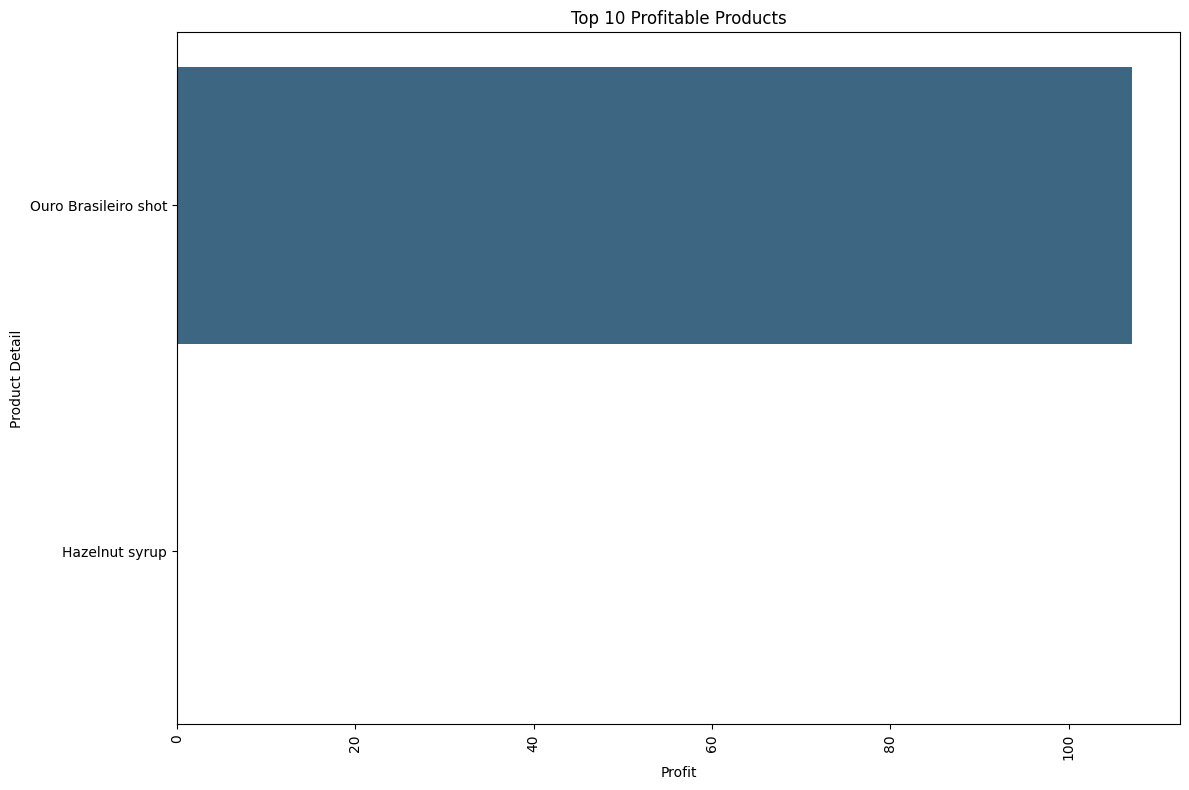

In [88]:
# Extracting the top 10 profitable products
top_10_profitable = top_profitable_products.sort_values(by='profit', ascending=False).head(10)

# Display top 10 profitable products
print("Top 10 Profitable Products:\n", top_profitable_products.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_detail', data=top_10_profitable, hue='product_detail', palette='viridis', dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Detail')
plt.legend([], frameon=False)  # Hide legend to comply with warning
plt.tight_layout()
plt.show()

##### **2. Top 10 loss-making products**

Top 10 Loss-Making Products:
                product_detail  transaction_qty  unit_price  total_sales  \
35               Ginger Scone             2540    3.183997      8011.61   
39  I Need My Bean! Diner mug              240   12.247748      2935.00   
40  I Need My Bean! Latte cup              315   14.325658      4509.00   
66       Scottish Cream Scone             1985    4.508683      8949.45   
9     Chocolate Chip Biscotti             1924    3.507911      6748.96   
18                  Croissant             1954    3.511837      6861.88   
46         Jumbo Savory Scone             2028    3.760767      7626.62   
37          Hazelnut Biscotti             2028    3.258467      6608.01   
34            Ginger Biscotti             1836    3.505831      6436.56   
17            Cranberry Scone             2092    3.259360      6818.44   

       profit  
35 -75.743442  
39  -4.459459  
40  -3.582237  
66  -0.286552  
9   -0.261068  
18  -0.248567  
46  -0.215339  
37  -0.160871  


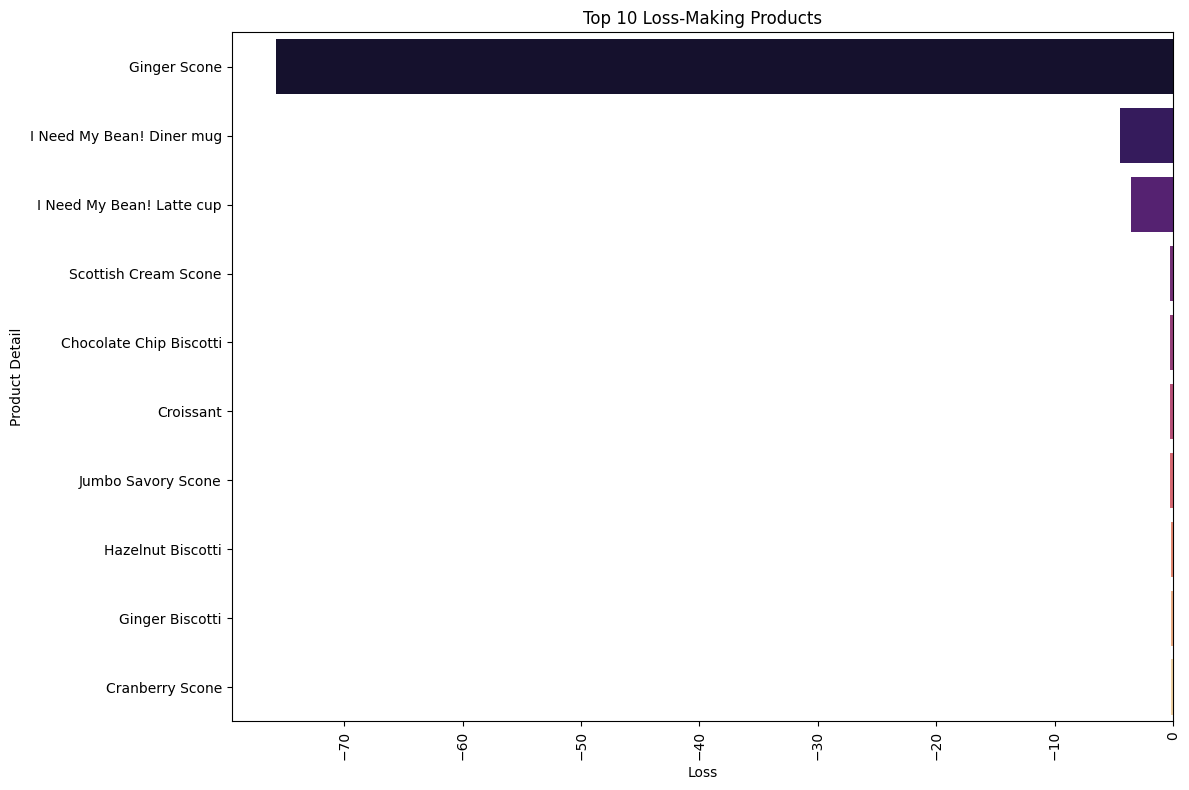

In [86]:
# Extracting the top 10 loss-making products
top_10_loss_making = top_loss_making_products.sort_values(by='profit', ascending=True).head(10)

# Display top 10 loss-making products
print("Top 10 Loss-Making Products:\n", top_loss_making_products.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_detail', data=top_10_loss_making, hue='product_detail', palette='magma', dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 Loss-Making Products')
plt.xlabel('Loss')
plt.ylabel('Product Detail')
plt.legend([], frameon=False)  # Hide legend to comply with warning
plt.tight_layout()
plt.show()

## **4. Profit Increase Prediction**

#### **1. Predictive Modeling**
Utilized predictive modeling to forecast future profits based on current data.

##### **Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features and target
features = product_summary[['transaction_qty', 'unit_price', 'total_sales']]
target = product_summary['profit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict future profits
profit_predictions = model.predict(X_test)

In [27]:
# Model coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})
print(coefficients)

           Feature  Coefficient
0  transaction_qty     0.000248
1       unit_price    -0.192248
2      total_sales    -0.000150


#### **2. Actual vs Predicted Profits**
Analyzed actual vs predicted profits to evaluate model accuracy.

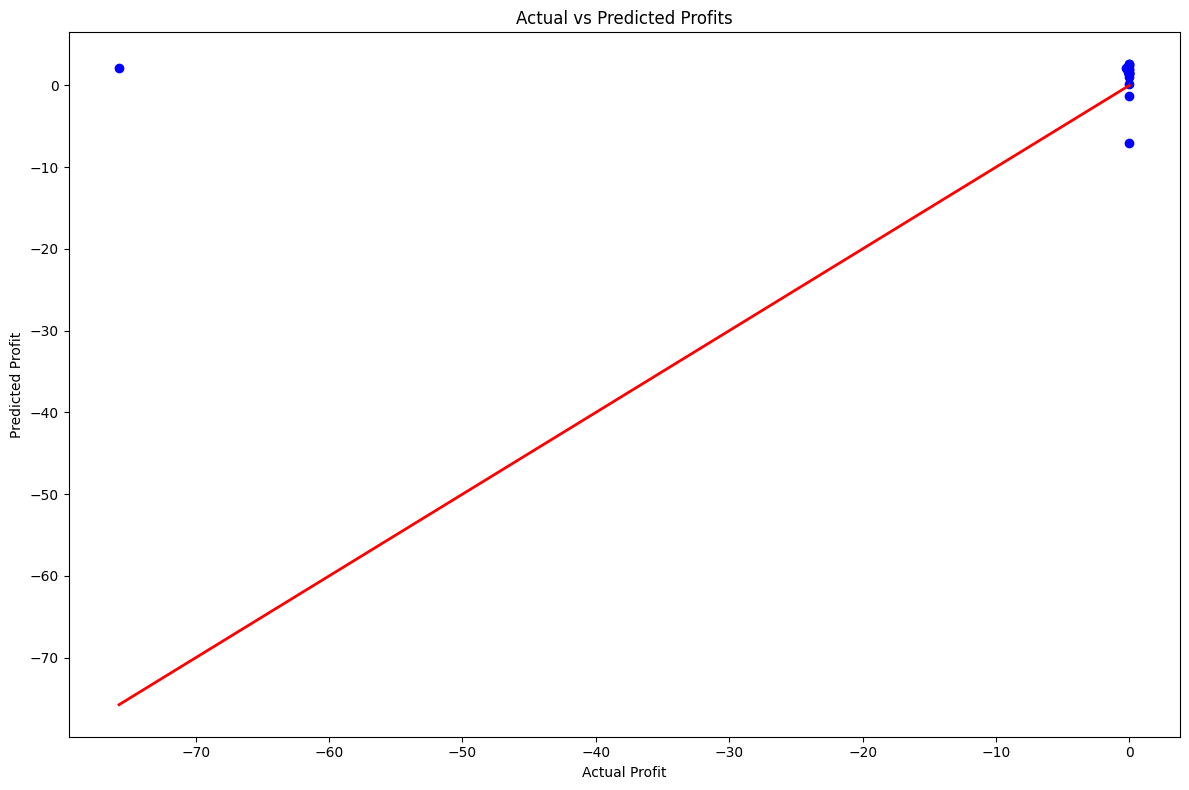

In [89]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, profit_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Profits')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.tight_layout()
plt.show()

#### **3. Time Series Analysis**
Performed time series analysis and ARIMA modeling for sales forecasting.

In [31]:
import statsmodels.api as sm

In [32]:
# Check the column names to find the correct date column name
print(data_cleaned.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'total_sales'],
      dtype='object')


In [36]:
# Assuming the date column is named 'transaction_date' (or replace it with the correct one)
data_cleaned['transaction_date'] = pd.to_datetime(data_cleaned['transaction_date'])

# Aggregate total sales by day for time series analysis
daily_sales = data_cleaned.set_index('transaction_date').resample('D')['total_sales'].sum()

# Fill missing days with 0 sales
daily_sales = daily_sales.fillna(0)

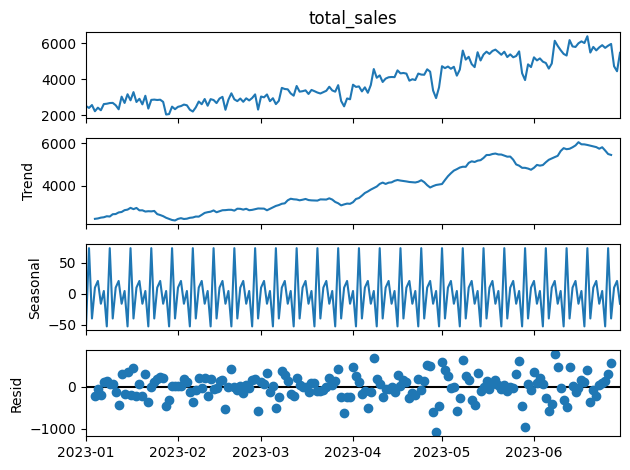

In [37]:
# Time series decomposition
decomposition = sm.tsa.seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.show()

#### **4. ARIMA Model for Forecasting**

In [39]:
# ARIMA model for time series forecasting on daily data

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_sales, order=(5, 1, 0))
arima_result = model.fit()

##### **Daily Sales Forecast**

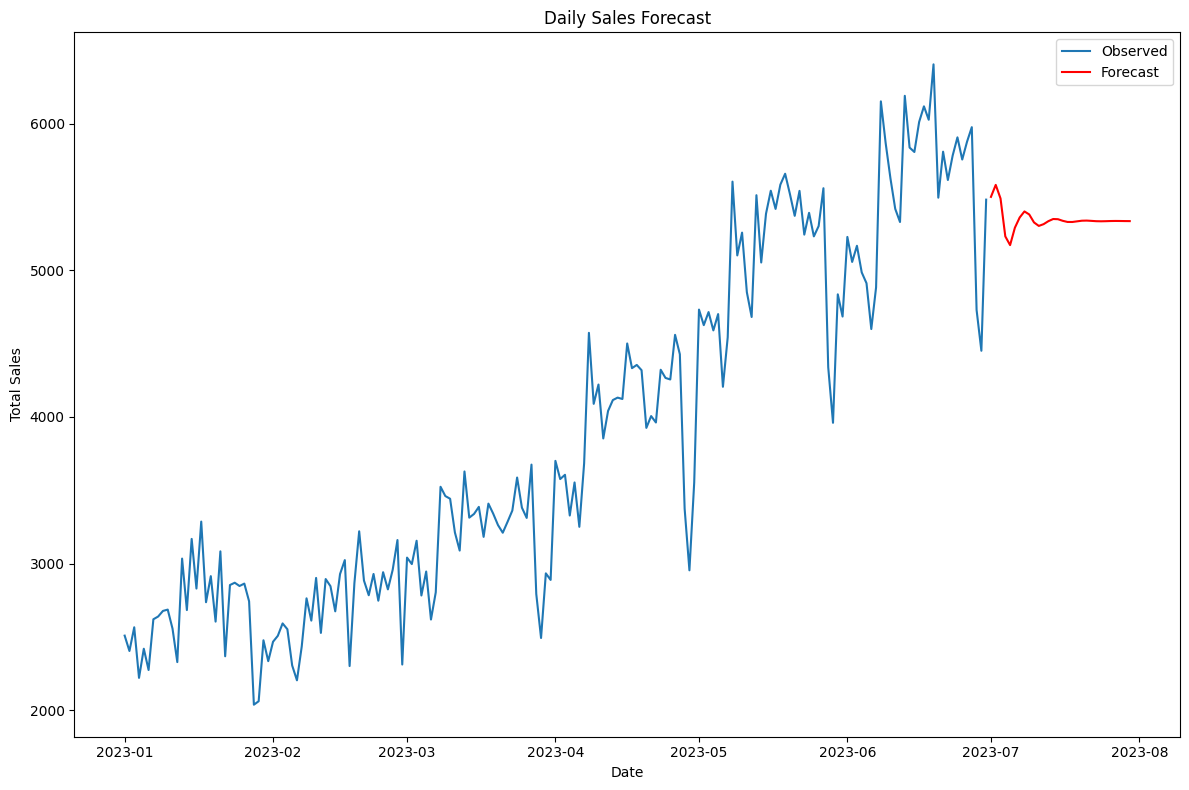

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

##### **Monthly Sales Forecast**

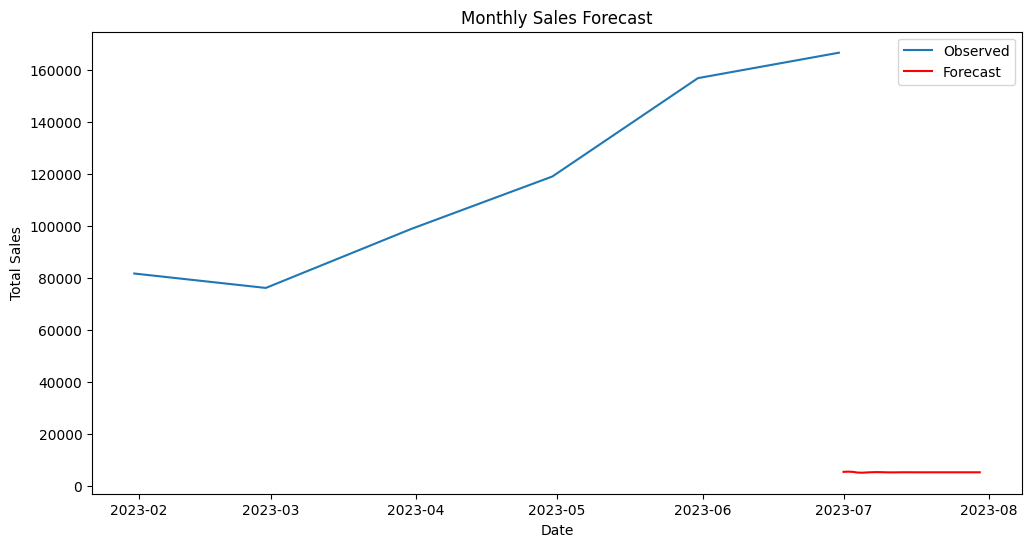

In [48]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## **5. Recommendations on Strategies to Increase Profit Margins**
- Calculated average profit margins for each product and identified the top 10 products with the highest profit margins.
- Provided strategic recommendations based on the analysis to increase overall profit margins.

#### **1. Profit Margin Calculation**

In [49]:
# Calculate average profit margin for each product
product_summary['profit_margin'] = (product_summary['profit'] / product_summary['total_sales']) * 100

# Identify top 10 products with highest profit margins
top_margin_products = product_summary.sort_values(by='profit_margin', ascending=False).head(10)

# Display recommendations based on analysis
print("Top 10 Products with Highest Profit Margins:")
print(top_margin_products[['product_detail', 'profit_margin']])

# Recommendations
recommendations = """
Recommendations to Increase Profit Margins:
1. Focus marketing efforts on top-performing products with high profit margins.
2. Optimize pricing strategies for products with medium profit margins to enhance profitability.
3. Explore bundling products to increase the perceived value and improve sales.
4. Increase inventory for high-margin products to avoid stockouts.
5. Negotiate better deals with suppliers to reduce the cost of goods sold for top products.
"""

print(recommendations)

Top 10 Products with Highest Profit Margins:
               product_detail  profit_margin
61       Ouro Brasileiro shot   1.203428e+00
38             Hazelnut syrup   1.198217e-14
79  Traditional Blend Chai Rg   0.000000e+00
44   Jamaican Coffee River Rg   0.000000e+00
49                Lemon Grass   0.000000e+00
48                   Latte Rg   0.000000e+00
47                      Latte   0.000000e+00
70      Spicy Eye Opener Chai   0.000000e+00
45   Jamaican Coffee River Sm   0.000000e+00
42      Jamacian Coffee River   0.000000e+00

Recommendations to Increase Profit Margins:
1. Focus marketing efforts on top-performing products with high profit margins.
2. Optimize pricing strategies for products with medium profit margins to enhance profitability.
3. Explore bundling products to increase the perceived value and improve sales.
4. Increase inventory for high-margin products to avoid stockouts.
5. Negotiate better deals with suppliers to reduce the cost of goods sold for top products.

In [42]:
# Recommendations based on coefficients
print("Recommendations to increase profit margins:")

for idx, row in coefficients.iterrows():
    if row['Coefficient'] > 0:
        print(f"Increasing {row['Feature']} is likely to increase profits.")
    else:
        print(f"Decreasing {row['Feature']} is likely to increase profits.")


Recommendations to increase profit margins:
Increasing transaction_qty is likely to increase profits.
Decreasing unit_price is likely to increase profits.
Decreasing total_sales is likely to increase profits.


#### **2. Identify Products with Potential for Increased Profit**

In [50]:
# Identify products with increasing sales trends
sales_trends = data_cleaned.groupby(['product_detail', pd.Grouper(key='transaction_date', freq='M')])['total_sales'].sum().reset_index()
sales_trends['month'] = sales_trends['transaction_date'].dt.to_period('M')

# Calculate monthly growth rate for each product
sales_trends['monthly_growth'] = sales_trends.groupby('product_detail')['total_sales'].pct_change()

# Identify top products with positive growth rate
positive_growth_products = sales_trends.groupby('product_detail')['monthly_growth'].mean().reset_index()
positive_growth_products = positive_growth_products[positive_growth_products['monthly_growth'] > 0].sort_values(by='monthly_growth', ascending=False).head(10)

print("Top 10 Products with Positive Sales Growth:")
print(positive_growth_products)

C:\Users\Arslan Khalid\AppData\Local\Temp\ipykernel_8796\1992797613.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trends = data_cleaned.groupby(['product_detail', pd.Grouper(key='transaction_date', freq='M')])['total_sales'].sum().reset_index()


Top 10 Products with Positive Sales Growth:
               product_detail  monthly_growth
70      Spicy Eye Opener Chai        0.437200
13     Columbian Medium Roast        0.397952
52       Morning Sunrise Chai        0.280175
77     Traditional Blend Chai        0.267583
1         Brazilian - Organic        0.232706
49                Lemon Grass        0.228384
12                  Civet Cat        0.227222
53    Morning Sunrise Chai Lg        0.198299
39  I Need My Bean! Diner mug        0.196301
42      Jamacian Coffee River        0.196050


In [43]:
# Identify top profitable products
top_profitable_products = profitable_products.sort_values(by='profit', ascending=False)
print("Top 10 profitable products:\n", top_profitable_products.head(10))

Top 10 profitable products:
           product_detail  transaction_qty  unit_price  total_sales  \
61  Ouro Brasileiro shot             3262     2.69622       8902.2   
38        Hazelnut syrup             2372     0.80000       1897.6   

          profit  
61  1.071316e+02  
38  2.273737e-13  


## **6. Loss Mitigation**

#### **1. Monthly Sales Growth Rate Visualization**

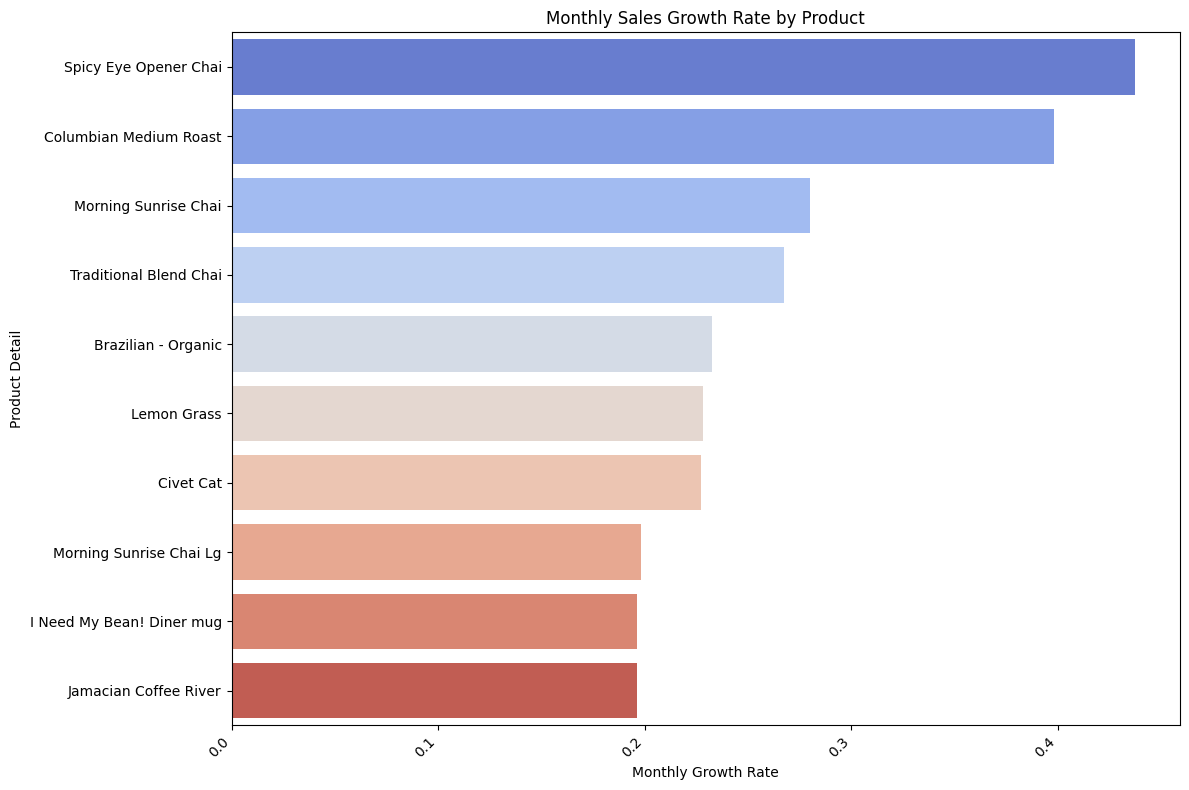

In [93]:
plt.figure(figsize=(12, 8))
sns.barplot(x='monthly_growth', y='product_detail', data=positive_growth_products, hue='product_detail', palette='coolwarm', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales Growth Rate by Product')
plt.xlabel('Monthly Growth Rate')
plt.ylabel('Product Detail')
plt.legend([], frameon=False)  # Hide legend to comply with warning
plt.tight_layout()
plt.show()

#### **2. Analyze Factors Contributing to Losses for Each Product/Service**

In [44]:
# Factors contributing to losses
loss_factors = loss_products[['product_detail', 'transaction_qty', 'unit_price', 'total_sales', 'profit']]
print("Factors contributing to losses:\n", loss_factors)

Factors contributing to losses:
                   product_detail  transaction_qty  unit_price  total_sales  \
0               Almond Croissant             1911    3.750988      7168.13   
1            Brazilian - Organic              214   18.000000      3852.00   
2                   Brazilian Lg             4317    3.500000     15109.50   
3                   Brazilian Rg             4385    3.000000     13155.00   
4                   Brazilian Sm             4310    2.200000      9482.00   
..                           ...              ...         ...          ...   
75  Sustainably Grown Organic Lg             4453    4.750000     21151.75   
76  Sustainably Grown Organic Rg             4329    3.750000     16233.75   
77        Traditional Blend Chai              153    8.950000      1369.35   
78     Traditional Blend Chai Lg             4174    3.000000     12522.00   
79     Traditional Blend Chai Rg             4512    2.500000     11280.00   

      profit  
0  -0.007903  


#### **3. Develop Strategies to Minimize or Eliminate Losses**

In [51]:
# Identify loss-making products
loss_products = product_summary[product_summary['profit'] < 0]

# Display loss-making products
print("Loss-Making Products:")
print(loss_products)

# Strategies to minimize losses
loss_mitigation_strategies = """
Strategies to Minimize or Eliminate Losses:
1. Review and optimize the pricing strategy for loss-making products.
2. Reduce production costs by negotiating better deals with suppliers.
3. Improve marketing efforts to boost sales of underperforming products.
4. Discontinue products with consistently low demand and high losses.
5. Analyze customer feedback to identify and address issues with loss-making products.
"""

print(loss_mitigation_strategies)

Loss-Making Products:
               product_detail  transaction_qty  unit_price  total_sales  \
0            Almond Croissant             1911    3.750988      7168.13   
9     Chocolate Chip Biscotti             1924    3.507911      6748.96   
10        Chocolate Croissant             3096    3.755195     11625.98   
17            Cranberry Scone             2092    3.259360      6818.44   
18                  Croissant             1954    3.511837      6861.88   
34            Ginger Biscotti             1836    3.505831      6436.56   
35               Ginger Scone             2540    3.183997      8011.61   
37          Hazelnut Biscotti             2028    3.258467      6608.01   
39  I Need My Bean! Diner mug              240   12.247748      2935.00   
40  I Need My Bean! Latte cup              315   14.325658      4509.00   
46         Jumbo Savory Scone             2028    3.760767      7626.62   
66       Scottish Cream Scone             1985    4.508683      8949.45   
73 

##### **Strategies to Minimize Losses:**

In [46]:
# Strategies to minimize losses
loss_strategies = []

for idx, row in loss_products.iterrows():
    strategies = f"To minimize losses for {row['product_detail']}: "
    if row['transaction_qty'] > 0:
        strategies += "Consider reducing transaction quantities. "
    if row['unit_price'] > 0:
        strategies += "Reevaluate pricing strategies. "
    if row['total_sales'] < 0:
        strategies += "Enhance marketing efforts to boost sales. "
    loss_strategies.append(strategies)

for strategy in loss_strategies:
    print(strategy)

To minimize losses for Almond Croissant: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Brazilian - Organic: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Brazilian Lg: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Brazilian Rg: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Brazilian Sm: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Cappuccino: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Cappuccino Lg: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Caramel syrup: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Chili Mayan: Consider reducing transaction quantities. Reevaluate pricing stra

#### **4. Propose Actionable Steps to Convert Loss-Making Products/Services into Profitable Ones**

In [47]:
# Actionable steps for loss-making products
actionable_steps = []

for idx, row in loss_products.iterrows():
    steps = f"To convert {row['product_detail']} into a profitable product: "
    if row['transaction_qty'] > 0:
        steps += "Decrease the number of transactions or improve operational efficiency. "
    if row['unit_price'] > 0:
        steps += "Optimize the pricing strategy. "
    if row['total_sales'] < 0:
        steps += "Increase sales through better marketing and promotions. "
    actionable_steps.append(steps)

for step in actionable_steps:
    print(step)

To convert Almond Croissant into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Brazilian - Organic into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Brazilian Lg into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Brazilian Rg into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Brazilian Sm into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Cappuccino into a profitable product: Decrease the number of transactions or improve operational efficiency. Optimize the pricing strategy. 
To convert Cappuccino Lg into a profitable product: Decrease the nu

##### **Actionable Steps for Loss-Making Products:**

In [52]:
# Actionable steps for loss-making products
actionable_steps = """
Actionable Steps to Convert Loss-Making Products/Services into Profitable Ones:
1. Conduct market research to understand customer needs and preferences.
2. Adjust product features or packaging based on customer feedback.
3. Implement targeted promotions and discounts to increase sales volume.
4. Bundle loss-making products with popular items to boost overall sales.
5. Monitor inventory levels closely to prevent overstocking and reduce storage costs.
"""

print(actionable_steps)


Actionable Steps to Convert Loss-Making Products/Services into Profitable Ones:
1. Conduct market research to understand customer needs and preferences.
2. Adjust product features or packaging based on customer feedback.
3. Implement targeted promotions and discounts to increase sales volume.
4. Bundle loss-making products with popular items to boost overall sales.
5. Monitor inventory levels closely to prevent overstocking and reduce storage costs.



## **7. Conclusion**
The analysis identified products that are generating profits and those that are incurring losses. By implementing targeted strategies to minimize losses and converting loss-making products into profitable ones, the coffee shop can improve its overall profitability. Regular monitoring and adjustment of pricing, production costs, and marketing efforts are essential to maintaining and increasing profit margins.

